# Medical Cost Personal Insurance Datasets



Problem Statement:



Insurance Forecast by using Linear Regression




Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .




Columns                                            

·  age: age of primary beneficiary

· sex: insurance contractor gender, female, male

· bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

· children: Number of children covered by health insurance / Number of dependents

· smoker: Smoking

· region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

· charges: Individual medical costs billed by health insurance




Predict : Charges  Can you accurately predict insurance costs?





Dataset Link - https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv

For more information about algorithm
Follow this -> https://scikit-learn.org/stable/index.html

In [2]:
#Lets import necessary Libraries.
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Lets check the shape of dataset
data.shape

(1338, 7)

So , here we have 1338 rows and 7 columns

# Data is Duplicated ?


In [62]:
data.duplicated().sum()

1

In [63]:
data.drop_duplicates(inplace=True)

In [6]:
#Lets check again the shape of dataset
data.shape

(1337, 7)

In [14]:
#Lets check the data type of dataset
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

 So ,Here we have we have .

int type  - 2 columns ( Age , Children)

Object type - 3 columns ( Sex, Smoker , Region)

Float Type - 2 columns (BMI ,charges)



Our target column is float type that is Charges. and we consider 99% of times float data has a continious data . so in this we have 2 continious data in pour dataset.

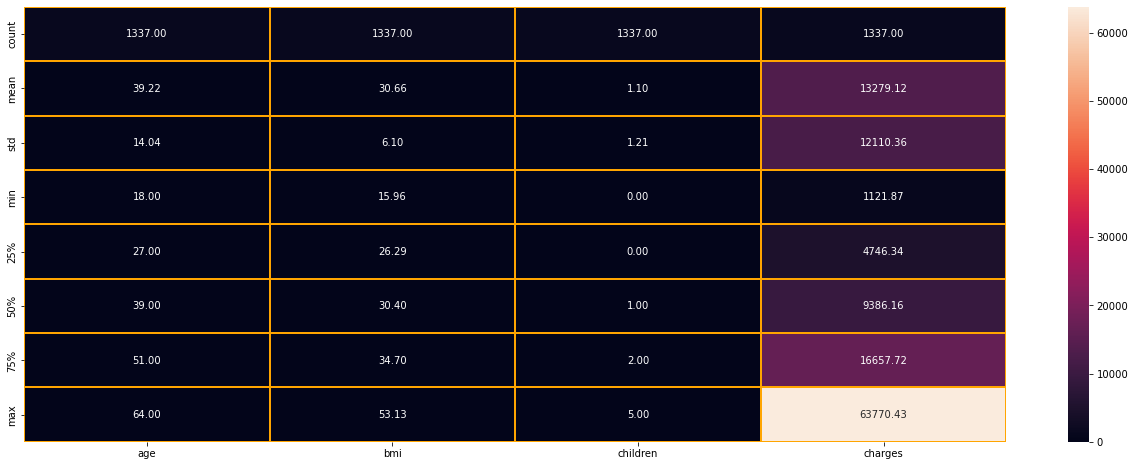

In [15]:
#Lets Discribe the dataset using heatmap
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(22,8))
sns.heatmap(data.describe(),annot=True,linewidths=0.3,linecolor='orange',fmt="0.2f")
plt.show()

# Observations
- No Missing Values


- Outliers in BMI.


We are good to proceed.

#  EDA (Exploratory data analysis)

- Basic Analysis with Visualisation

In [16]:
#Lets plot relplot(Relational Plot)
import seaborn as sns # Importing Visualisation library (Seaborn and Matplotlib)
import matplotlib.pyplot as plt

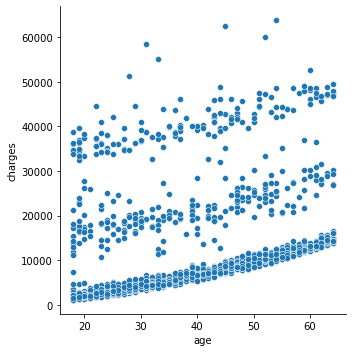

In [17]:
#Lets plot age
sns.relplot(x='age',y='charges',data=data,kind='scatter')
plt.show()

So , Here we can see the . there are  some positive relationship.

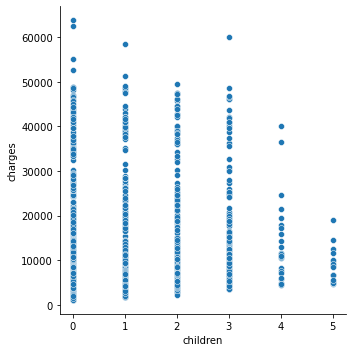

In [18]:
#Lets plot children columns
sns.relplot(x='children',y='charges',data=data,kind='scatter')
plt.show()

As the number of children increase the charges decrease ,We can clearly see that there is no relationship. in children and charges column 


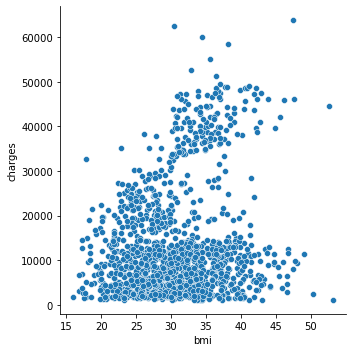

In [19]:
#Lets plot BMI
sns.relplot(x='bmi',y='charges',data=data,kind='scatter')
plt.show()

We can see that . BMI and Charges has no  relationship..

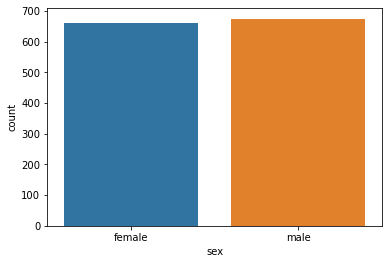

male      675
female    662
Name: sex, dtype: int64

In [20]:
#Lets plot sex data .Using count plot
sns.countplot(x='sex',data=data)
plt.show()
data['sex'].value_counts()

So , in sex column we have Male - 675 and Female - 662

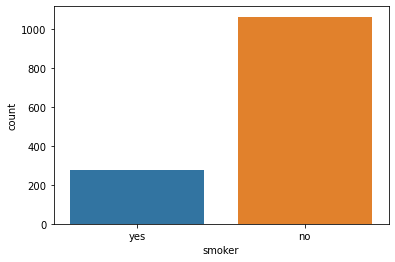

no     1063
yes     274
Name: smoker, dtype: int64

In [21]:
#Lets plot smoker . using count plot.
sns.countplot(x='smoker',data=data)
plt.show()
data['smoker'].value_counts()

So ,here we have 274 person who are smoking and 1063 person who are not smoking.

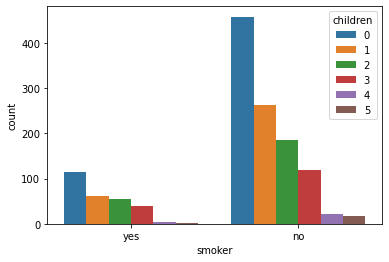

In [22]:
#Lets check how much  are smoking who have dependents
sns.countplot(x='smoker',data=data,hue='children',)
plt.show()

- So who have 0 Dependents - More then 100 peoples are smoking

- So Who have 1 Dependents - More then 60 People are somking


- So Who have 2 Dependents - More then 50 People are smoking


- So Who have 3 Dependents - Almost 50 people are somking


- So Who have 4 Dependents - Almost 4 - 6 People are Smoking


- So who have 5 Dependents - Almost 1-2 People are Smoking

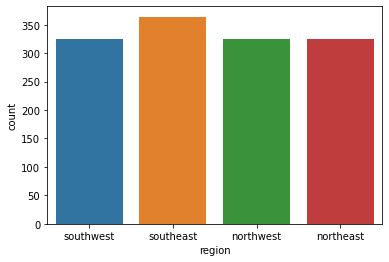

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [23]:
#Lets plot region 
sns.countplot(x='region',data=data)
plt.show()
data['region'].value_counts()

So here we can see that 


Beneficiary's residential area in the US from SouthEast  is - 364



Beneficiary's residential area in the US from SouthWest is - 325



Beneficiary's residential area in the US from NorthEast is - 324




beneficiary's residential area in the US from NorthWest is - 324

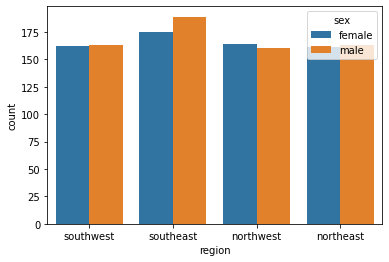

In [24]:
#Lets check how much male and how much female from all 4 location
sns.countplot(x='region',data=data,hue='sex')
plt.show()

So here we can see that from ,

SouthWest - Female is 162 and Male is 165

SouthEast - Female is 175 and Male is almost 185


NorthWest -Female is almost 168 and Male is almost 160


North east -  Female is almost almost 160 and Male is almost 168

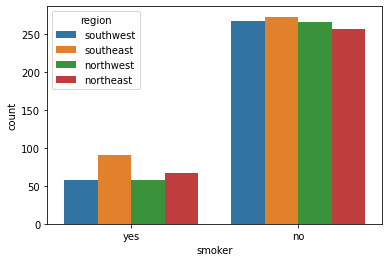

In [25]:
#Lets check how much smoker from which part of USA
sns.countplot(x='smoker',data=data,hue='region')
plt.show()

From Southwest from USA only almost 60 person  are smoker

From Southwest from USA more then 250 person  are Non smoker

From SouthEast from USA only almost 90 person  are smoker


From SouthEast from USA more then 250 person  are Non smoker


From NorthWest from USA only almost 60 person are smoker


From NorthWest from USA more then 250 person  are Non smoker



From NorthEast from USA more then almost 70 person are smoker


From NorthEast from USA more then 250 person  are Non smoker




So, here we observe that  number of people are smoker in 4 region in USA 


# Count of Smokers by Sex and Region

In [27]:
import warnings
warnings.filterwarnings('ignore')
data.groupby(['region'])['smoker','sex'].value_counts()


region     smoker  sex   
northeast  no      female    132
                   male      125
           yes     male       38
                   female     29
northwest  no      female    135
                   male      131
           yes     female     29
                   male       29
southeast  no      female    139
                   male      134
           yes     male       55
                   female     36
southwest  no      female    141
                   male      126
           yes     male       37
                   female     21
dtype: int64

So we get almost same as what we see in the previous code.

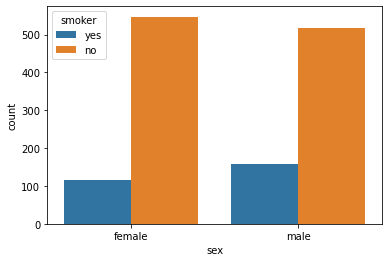

In [28]:
#Lets check how much male and female are smoker

sns.countplot(x='sex',data=data,hue='smoker')
plt.show()

So ,here we can observe that 

Female - more 100 peoples are smoker  


Male - More then  peoples are smoker 

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

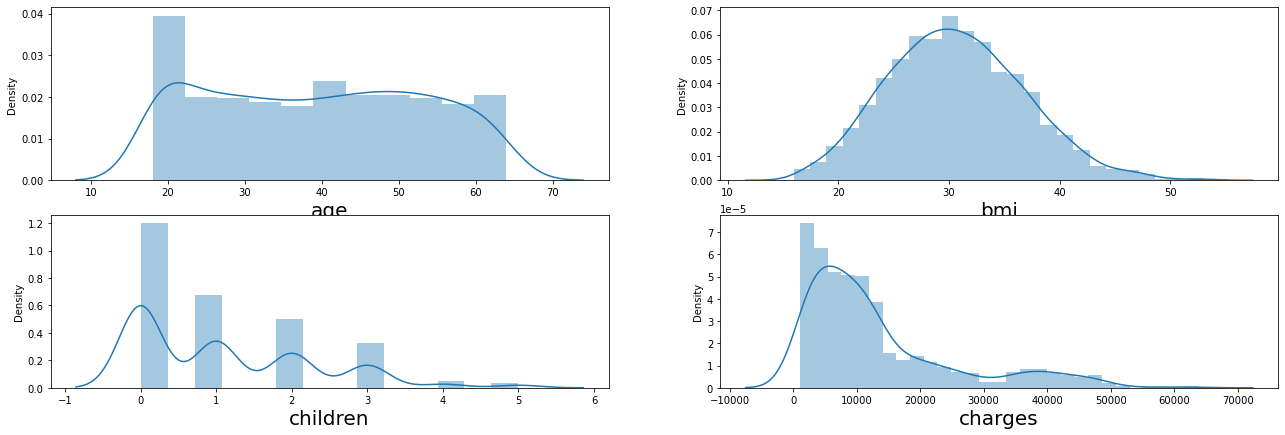

In [31]:
#Lets check the distribution of the columns
plt.figure(figsize=(22,7))
plotnumber=1
for column in data[['age','bmi','children','charges']]:#Here we taking only numerical data
    if plotnumber <=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

# Observation


Age - > Age in noramlly Distributed

BMI -> BMI contains some outliers because we have the Normal BMI rate (using the ratio of height to weight, ideally 18.5 to 24.9)

Children -> 6 Children Is normal,  We consider as noraml distributed


Chrages - > Charges is our target column.

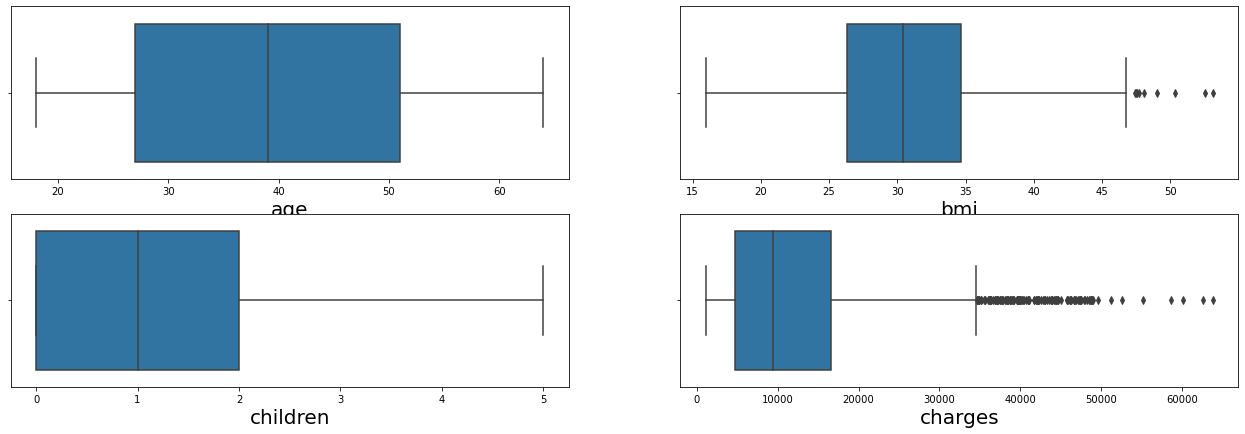

In [32]:
#Lets Plot BOX plot and Check Outliers by visualization
#Lets check the distribution of the columns
plt.figure(figsize=(22,7))
plotnumber=1
for column in data[['age','bmi','children','charges']]:#Here we taking only numerical data
    if plotnumber <=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

Observation

Here we can clearly see that . BMI has some outliers . We have to fix them.

# First we have to check correlatiom before losing any data because we have small dataset .

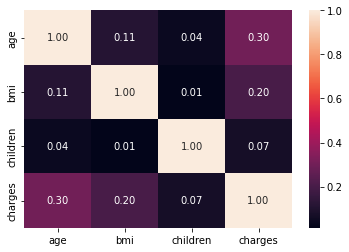

In [33]:
sns.heatmap(data.corr(),annot=True,fmt='.2f',)
plt.show()

# Observations

1 - BMI have almost 20% relationship with charges

2- Age have almost 30%  relationship with charges

2 -Childres have almost 7% relationship with charges

In [35]:
#Lets check correlation with target columns
data.corr()['charges']

age         0.298308
bmi         0.198401
children    0.067389
charges     1.000000
Name: charges, dtype: float64

As we seen before this code . almost same we get not.

# Data Preprocessing

In [65]:
#Lets use encoding technique and convert all categorical data to numerical data
#First filter categorical column
numeric=['int8','int16','int32','int64','float','float32','float64']
categorical_column=[]
feature=data.columns.values.tolist()

for col in feature:
    if data[col].dtype in numeric:
        continue
    categorical_column.append(col)
categorical_column

['sex', 'smoker', 'region']

In [66]:
df_dummies=pd.get_dummies(data[categorical_column],drop_first=True)
df_dummies.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


So , Here we have to Encode Sex , Smoker and Region. using pd.get_dummies.

In [67]:
#Lets join with DataFrame
data=data.join(df_dummies)


In [68]:
#Lets check
data.head()

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


In [69]:
#Lets drop unwanted column (Like categorical column)
data.drop(columns=categorical_column,axis=1,inplace=True)

In [70]:
#Lets check columns are deleted or not
print(data.shape)
data.head()

(1337, 9)


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


Now we completed Encoding Part and Visualization part 



# Lets Handle the Outlies By using Zscore

We see above, only BMI column contains outliers .lets check again


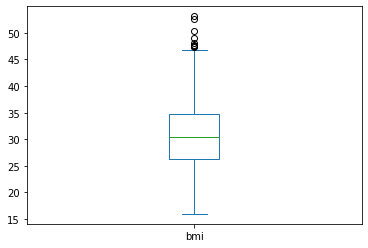

In [77]:
#Lets plot agian BMI
data['bmi'].plot.box()
plt.show()

We can . Clearly see that there is outliers we have to treat that. using zscore

In [79]:
data.shape

(1337, 9)

In [81]:
#Lets import zscore
import numpy as np
from scipy.stats import zscore
z_score=zscore(data[['bmi']])
abs_score=np.abs(z_score)
filtering_entry=(abs_score<3).all(axis=1)
data=data[filtering_entry]
data.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000
mean,39.249062,30.601564,1.097524,13274.344476,0.503376,0.204801,0.243061,0.270068,0.243811
std,14.028963,6.003179,1.206626,12090.004775,0.500176,0.403708,0.429092,0.444161,0.429541
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.220000,0.000000,4747.052900,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.305000,1.000000,9386.161300,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.600000,2.000000,16657.717450,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,48.070000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
data.shape

(1333, 9)

# Check How Much Data Loss

In [83]:
data_loss=((1337-1333)/1337)*100
data_loss

0.2991772625280479

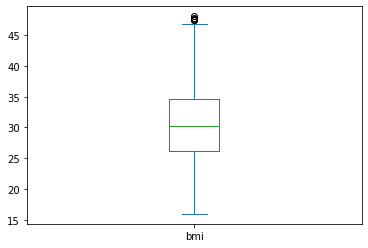

In [84]:
#Lets plot agian BMI
data['bmi'].plot.box()
plt.show()

So here we can see that we deleted 4 records from our bmi 

# Dividing data in feature and vectors

In [86]:
x=data.drop(columns='charges')#Feature
y=data.charges#Target

# Lets Standardize the feature data


In [94]:
#Lets import standardscaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.44391729, -0.45019112, -0.9099223 , ..., -0.5666657 ,
        -0.6082678 ,  1.76111853],
       [-1.51522515,  0.52799105, -0.08085434, ..., -0.5666657 ,
         1.64401271, -0.56782095],
       [-0.80214655,  0.39967754,  1.57728158, ..., -0.5666657 ,
         1.64401271, -0.56782095],
       ...,
       [-1.51522515,  1.04124506, -0.9099223 , ..., -0.5666657 ,
         1.64401271, -0.56782095],
       [-1.30130157, -0.80013704, -0.9099223 , ..., -0.5666657 ,
        -0.6082678 ,  1.76111853],
       [ 1.55101281, -0.25522125, -0.9099223 , ...,  1.76470891,
        -0.6082678 , -0.56782095]])

# Now use VIF for checking multicollinearity problem

VIF - > Variance Inflation Factor

In [97]:
#Lets import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['feature']=x.columns

In [99]:
#Lets check how lookinf VIF score
vif

,vif,feature
0,1.018685,age
1,1.101832,bmi
2,1.004079,children
3,1.008101,sex_male
4,1.012060,smoker_yes
5,1.516219,region_northwest
6,1.639773,region_southeast
7,1.527871,region_southwest


In VIF we consider threshold 5 VIF Score . if any feature is greater then 5 VIF Score it means it contains multicollinearity problmem/


So in our dataset  no feature have more then 5 vif score . so it means out dataset is not contain any multicollinearity problem.

In [232]:
#lets do train test split
#Import train test split
from sklearn.model_selection import train_test_split
#Import Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
#Import R2_score
from sklearn.metrics import r2_score

In [111]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=i,test_size=0.20)
    
    lr.fit(x_train,y_train)
    
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)== round(r2_score(y_test,pred_test)*100,1):
        print("At random state ",i,"The model performs very well ")
        print("At random state ",i,"The model performs very well ")
        print("Training Accuracy Score is :- ",r2_score(y_train,pred_train)*100)
        print("Testing Accuracy Score is :- ",r2_score(y_test,pred_test)*100,"/n")

At random state  48 The model performs very well 
At random state  48 The model performs very well 
Training Accuracy Score is :-  75.00325664822107
Testing Accuracy Score is :-  74.9518924650371 /n
At random state  71 The model performs very well 
At random state  71 The model performs very well 
Training Accuracy Score is :-  75.01233655663889
Testing Accuracy Score is :-  75.03640330161798 /n
At random state  173 The model performs very well 
At random state  173 The model performs very well 
Training Accuracy Score is :-  74.97549261903781
Testing Accuracy Score is :-  75.00020036783052 /n
At random state  497 The model performs very well 
At random state  497 The model performs very well 
Training Accuracy Score is :-  74.97889363101926
Testing Accuracy Score is :-  74.9856080154621 /n
At random state  532 The model performs very well 
At random state  532 The model performs very well 
Training Accuracy Score is :-  74.98197335101746
Testing Accuracy Score is :-  75.00115311378536

Here i am not getting any Satisfied result so i plan for checking in diffrent ways

In [114]:
#Lets check with diffrent method
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    x_pred=lr.predict(x_train)
    y_pred=lr.predict(x_test)
    print(f" At random state {i} , the Training accuracy is :- {r2_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {r2_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the Training accuracy is :- 0.753356627807823
 At random state 0 , the testing accuracy is :- 0.738569185968742


 At random state 1 , the Training accuracy is :- 0.7505918303770204
 At random state 1 , the testing accuracy is :- 0.7479440447293855


 At random state 2 , the Training accuracy is :- 0.7412220703508512
 At random state 2 , the testing accuracy is :- 0.7858237345882718


 At random state 3 , the Training accuracy is :- 0.75378481050513
 At random state 3 , the testing accuracy is :- 0.7365653134708205


 At random state 4 , the Training accuracy is :- 0.744904917213556
 At random state 4 , the testing accuracy is :- 0.76824108217428


 At random state 5 , the Training accuracy is :- 0.7552073095015868
 At random state 5 , the testing accuracy is :- 0.7291612062841368


 At random state 6 , the Training accuracy is :- 0.7542838910983224
 At random state 6 , the testing accuracy is :- 0.7326212964215881


 At random state 7 , the Training accuracy is :-

So , Here i am going with Random State - 75

In [177]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=75)

In [178]:
lr.fit(x_train,y_train)

LinearRegression()

# For Training Score 

In [179]:
lr.score(x_train,y_train)
train_pred=lr.predict(x_train)
r2_score(y_train,train_pred)

0.7438057518830352

# For Testing Score

In [180]:
lr.score(x_test,y_test)
pred_train=lr.predict(x_test)
r2_score(y_test,pred_train)

0.7750515289374283

# Cross Validation of the Model

In [181]:
train_accuracy=r2_score(y_train,x_pred)
test_accuracy=r2_score(y_test,y_pred)
#Lets import Cross Validation
from sklearn.model_selection import cross_val_score

In [182]:
for j in range(2,50):
    cv_score=cross_val_score(lr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    
    print(f"At cross fold {j} the CV Score is {cv_mean} and accuracy for training is {train_accuracy} and accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the CV Score is 0.748283303793706 and accuracy for training is -0.840022075011347 and accuracy for testing is -0.7870871766226133


At cross fold 3 the CV Score is 0.7438132914249685 and accuracy for training is -0.840022075011347 and accuracy for testing is -0.7870871766226133


At cross fold 4 the CV Score is 0.7456690905347216 and accuracy for training is -0.840022075011347 and accuracy for testing is -0.7870871766226133


At cross fold 5 the CV Score is 0.7465220525129679 and accuracy for training is -0.840022075011347 and accuracy for testing is -0.7870871766226133


At cross fold 6 the CV Score is 0.7449836012841727 and accuracy for training is -0.840022075011347 and accuracy for testing is -0.7870871766226133


At cross fold 7 the CV Score is 0.7444521098192547 and accuracy for training is -0.840022075011347 and accuracy for testing is -0.7870871766226133


At cross fold 8 the CV Score is 0.7425539851429888 and accuracy for training is -0.840022075011347 and accu

Since the number of folds dont have such impact on the accuracy and cv_score . So cv=2 is selected.

 Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score

# Lets Plot Best Fit Line and Check How Data points are Close to the Best Fit Line

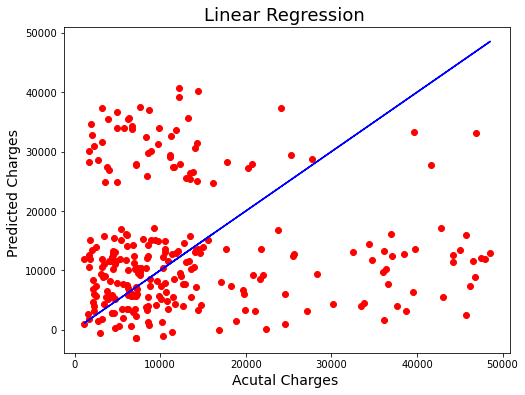

In [183]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Acutal Charges ",fontsize=14)
plt.ylabel("Predicted Charges ",fontsize=14)
plt.title("Linear Regression ",fontsize=18)
plt.savefig('lr.png')
plt.show()

Here we can see that . Most of the data is  near the best fit line. but we have lots of data dont come near the best fit line. Lets tune the parameter

# Regularization -

In [239]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [268]:
#lets import Lasso (Least absolute shrinkage and selection operator)
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
#LASSOCV will return best alpha after max iteration
#normalize is subtracting the mean and divide by L2_norm



lasscv=LassoCV(alphas = None , max_iter =100,normalize=True)
lasscv.fit(x_train,y_train)
          
          
          


LassoCV(max_iter=100, normalize=True)

In [269]:
#best alpha paremetere
alpha=lasscv.alpha_
alpha

3.5821541933107004

In [242]:
#Now that we have best parameter,Lets use Lasso regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=3.5821541933107004)

In [243]:
lasso_reg.score(x_test,y_test)

0.7751355168587747

So , With lasso we get 77 % accuracy with testing data 

# Using Ridge Regression Model.
Ridge will return best alpha and coefficients after performing 10 Cross validation.¶

In [244]:
# Ridge will return best alpha and coefficients after performing 10 Cross validation

ridgecv=RidgeCV(alphas =np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [245]:
ridgecv.alpha_

0.001

In [250]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [251]:
ridge_model.score(x_test,y_test)

0.7750514893301945

We get same result in lasso and ridge . So i think that if we using RandomForest may be our accuracy will boost.

# Ensemble Technique

In [253]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameter={'criterion':['mse','mae'],
          'max_features':['auto','sqrt','log2'],
          'max_depth':range(20,50),
          'min_samples_split':range(10,15),
          'min_samples_leaf':range(12,14)}



rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_depth': 26, 'max_features': 'auto', 'min_samples_leaf': 12, 'min_samples_split': 10}


In [256]:
rf=RandomForestRegressor(criterion='mse',max_features='auto',max_depth=26,min_samples_leaf=12,min_samples_split=10)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print("R2 Score",rfs*100)
rfs_score=cross_val_score(rf,x,y,cv=5)
rfc=rfs_score.mean()
print('Cross Val Score',rfc*100)

R2 Score 88.2592861936535
Cross Val Score 85.70885019709644


In [260]:
rf.score(x_train,y_train)#Training Score

0.8821487890151009

In [261]:
rf.score(x_test,y_test)#Testing Score

0.882592861936535

Here we got 88 % Training Score and Testing Score both . and now our score is better then Linear Regression . This reason for i am going with Random Forest

In [262]:
#So lets save the model
import pickle
filename=('Insurence Foresast')
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [263]:
loaded_model=pickle.load(open('Insurence Foresast','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

88.2592861936535


In [266]:
conclusion=pd.DataFrame([loaded_model.predict(x_train)[:],pred_decision[:]],index=['predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065
predicted,2185.880579,10397.078317,7181.483398,7671.268939,8418.146373,2690.687687,11834.572644,14441.296297,27152.927069,18995.934033,...,3847.544582,3339.947363,14582.622262,44591.238247,47781.213452,5126.740046,2026.337808,39808.342056,6575.461646,6582.585832
original,17053.774289,11246.623143,7214.699786,7580.239601,8717.858457,13138.937292,12515.856756,3771.329014,9742.125832,36252.301797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [267]:
#Student of DataScience
#Student of DataTrained- Saurav
#Date-19-10-22
#Time - 21:12